In [1]:
#Import the main libraries. 
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf


# Data Management
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# Data splitting
from sklearn.model_selection import train_test_split

# Hyperparameter selection
from sklearn.model_selection import GridSearchCV

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from statsmodels.discrete.discrete_model import Logit
import statsmodels.tools as sm

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import itertools


from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


In [58]:
data0 = pd.read_csv('weatherYerevan_2014-2019.csv')
data = pd.read_csv("final_data.csv", index_col="dt_iso", pa)

In [29]:
data0.dt_iso = pd.to_datetime(data0.dt_iso, 
                             format="%Y-%m-%d %H:%M:%S +0000 UTC")
data0.set_index(["dt_iso"], inplace=True)
data0.drop(["dt"], axis=1, inplace=True)

In [33]:
data.corr()

,temp,pressure,humidity,wind_speed,wind_deg,clouds_all
temp,1.000000,0.006341,-0.801133,0.688277,-0.185884,-0.346875
pressure,0.006341,1.000000,-0.145099,0.055970,-0.118918,-0.093567
humidity,-0.801133,-0.145099,1.000000,-0.669699,0.152411,0.557254
wind_speed,0.688277,0.055970,-0.669699,1.000000,-0.040831,-0.198775
wind_deg,-0.185884,-0.118918,0.152411,-0.040831,1.000000,0.257076
clouds_all,-0.346875,-0.093567,0.557254,-0.198775,0.257076,1.000000


In [34]:
# First 3 lags of y
for i in range(1, 4):
    data["lag_temp" + str(i)] = data["temp"].shift(i)

# Fitrs 3 lags for x
for i in range(1, 4):
    data["lag_clouds" + str(i)] = data["clouds_all"].shift(i)
for i in range(1, 4):
    data["lag_press" + str(i)] = data["pressure"].shift(i)
for i in range(1, 2):
    data["lag_hum" + str(i)] = data["humidity"].shift(i)
for i in range(1, 2):
    data["lag_speed" + str(i)] = data["wind_speed"].shift(i)
for i in range(1, 2):
    data["lag_deg" + str(i)] = data["wind_deg"].shift(i)
    

In [35]:
# drop columns and nan values
data.dropna(inplace=True)

In [36]:
Y = data["temp"]

In [37]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.012511
p-value: 0.281114
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


The ADF Statistics value should be less than the t_critical to reject the H0 and say that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

# ARDL

In [39]:
X = data.drop(["temp", "lag_temp2", "wind_speed", "lag_press2", "lag_press3", "lag_temp3", "lag_clouds2", "lag_clouds3"], axis=1)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     7383.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        23:04:59   Log-Likelihood:                 805.57
No. Observations:                1397   AIC:                            -1591.
Df Residuals:                    1387   BIC:                            -1539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
pressure        0.0317      0.009      3.397      0.001       0.013       0.050
humidity       -0.2004      0.009    -21.667      0.000      -0.219      -0.182
wind_deg       -0.0224      0.004     -5.322      0.000      -0.031      -0.014
clouds_all      0.0589      0.006     10.628      0.000       0.048       0.070
lag_temp1       0.9653      0.007    137.511      0.000       0.952       0.979
lag_clouds1    -0.0456      0.006     -7.924      0.000      -0.057      -0.034
lag_press1     -0.0366      0.009     -3.931      0.000      -0.055      -0.018
lag_hum1        0.1343      0.010     13.479      0.000       0.115       0.154
lag_speed1     -0.0424      0.005     -7.789      0.000      -0.053      -0.032
lag_deg1       -0.0121      0.004     -2.838      0.005      -0.020      -0.004
==============================================================================
Omnibus:                       66.391   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.235
Skew:                          -0.348   Prob(JB):                     2.86e-27
Kurtosis:                       4.271   Cond. No.                         7.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SARIMAX

In [40]:
data = pd.read_csv("final_data.csv")

In [41]:
model=sm.tsa.statespace.SARIMAX(endog=data['temp'],exog=data.drop(['dt_iso', 'temp'], axis=1),order=(2,0,0),seasonal_order=(0,0,0,0),trend='c',enforce_invertibility=False)
results=model.fit()
results.summary()
model=sm.tsa.statespace.SARIMAX(endog=data['temp'],exog=data.drop(['dt_iso', 'temp'], axis=1),order=(2,0,0),seasonal_order=(0,0,0,0),trend='c',enforce_invertibility=False)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   temp   No. Observations:                 1400
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 763.684
Date:                Tue, 07 May 2019   AIC                          -1509.369
Time:                        23:05:08   BIC                          -1462.171
Sample:                             0   HQIC                         -1491.725
                               - 1400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.554e-05      0.004      0.014      0.989      -0.008       0.008
pressure       0.0309      0.007      4.756      0.000       0.018       0.044
humidity      -0.1720      0.007    -24.300      0.000      -0.186      -0.158
wind_speed     0.0193      0.005      4.218      0.000       0.010       0.028
wind_deg      -0.0062      0.003     -2.007      0.045      -0.012      -0.000
clouds_all     0.0538      0.005     11.800      0.000       0.045       0.063
ar.L1          1.1620      0.024     48.823      0.000       1.115       1.209
ar.L2         -0.1783      0.024     -7.494      0.000      -0.225      -0.132
sigma2         0.0196      0.001     33.576      0.000       0.018       0.021
===================================================================================
Ljung-Box (Q):                      109.45   Jarque-Bera (JB):               177.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.40
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
results.forecast(steps=3, exog=([1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]))

1400   -0.250585
1401   -0.253200
1402   -0.250693
dtype: float64

In [43]:
m = data0.temp.mean()
sd = data0.temp.std()

In [44]:
results.forecast(steps=3, exog=([1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1])) * sd + m -273.15

1400    9.778953
1401    9.746843
1402    9.777626
dtype: float64

Last two winters were warmer compared to previous ones.  
Let's check this hypothesis using T-test, and see if there is a significant difference in means.  

In [59]:
data.index = pd.to_datetime(data.index)

In [60]:
df = pd.DataFrame({"winter_2015" : data["2015-12-01":"2016-02-28"].temp.values,
                    "winter_2016" : data["2016-12-01":"2017-02-28"].temp.values,
                    "winter_2017" : data["2017-12-01":"2018-02-28"].temp.values,
                    "winter_2018" : data["2018-12-01":"2019-02-28"].temp.values
})

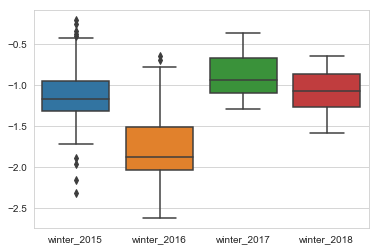

In [61]:
sns.boxplot(data = df)

In [62]:
df.var()

winter_2015    0.149179
winter_2016    0.191821
winter_2017    0.065853
winter_2018    0.062027
dtype: float64

In [63]:
df.mean()

winter_2015   -1.121966
winter_2016   -1.780406
winter_2017   -0.883305
winter_2018   -1.074412
dtype: float64

In [64]:
from scipy import stats

In [65]:
print("T-test for 2016 vs 2018: ", stats.ttest_rel(df.winter_2016, df.winter_2018))
print("T-test for 2015 vs 2018: ", stats.ttest_rel(df.winter_2015, df.winter_2018))
print("T-test for 2016 vs 2017: ", stats.ttest_rel(df.winter_2016, df.winter_2017))
print("T-test for 2015 vs 2017: ", stats.ttest_rel(df.winter_2015, df.winter_2017))

T-test for 2016 vs 2018:  Ttest_relResult(statistic=-14.733557601172304, pvalue=1.3398051269676616e-25)
T-test for 2015 vs 2018:  Ttest_relResult(statistic=-1.2090098086430627, pvalue=0.22986117321652397)
T-test for 2016 vs 2017:  Ttest_relResult(statistic=-15.528599651195524, pvalue=4.5544444136548364e-27)
T-test for 2015 vs 2017:  Ttest_relResult(statistic=-6.619789406459984, pvalue=2.630251457706028e-09)


In [66]:
print("Shapiro test for 2018 vs 2016", stats.shapiro(df.winter_2018 - df.winter_2016))
print("Shapiro test for 2017 vs 2015", stats.shapiro(df.winter_2017 - df.winter_2015))
print("Shapiro test for 2018 vs 2015", stats.shapiro(df.winter_2018 - df.winter_2015))
print("Shapiro test for 2017 vs 2016", stats.shapiro(df.winter_2017 - df.winter_2016))

Shapiro test for 2018 vs 2016 (0.9885522723197937, 0.6245923638343811)
Shapiro test for 2017 vs 2015 (0.9389685988426208, 0.0003709469747263938)
Shapiro test for 2018 vs 2015 (0.9703464508056641, 0.03740397468209267)
Shapiro test for 2017 vs 2016 (0.9649539589881897, 0.015771985054016113)


Differences are normally distributed for 2018 vs 2016. 

KeyError: range(0, 1400)

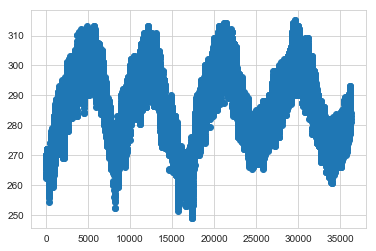

In [76]:
plt.scatter(x=data0.index, y = data0.temp)

In [77]:
data.describe()

,temp,pressure,humidity,wind_speed,wind_deg,clouds_all
count,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03
mean,2.325521e-16,1.732741e-17,1.276756e-16,-6.309239e-16,-1.119739e-16,-1.130048e-17
std,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00
min,-2.616620e+00,-4.232883e+00,-2.019719e+00,-1.503079e+00,-2.692395e+00,-1.283032e+00
25%,-7.849988e-01,1.279248e-01,-9.261896e-01,-7.492293e-01,-6.390986e-01,-8.440998e-01
50%,7.110644e-04,2.792797e-01,9.343579e-03,-2.325573e-01,-5.258533e-02,-1.595894e-01
75%,8.911823e-01,4.392736e-01,8.563037e-01,6.012228e-01,6.207311e-01,6.758597e-01
max,1.879063e+00,9.819411e-01,2.027585e+00,3.847773e+00,3.989816e+00,2.629402e+00


In [78]:
data0.weather_main.value_counts()

Clouds          16384
Clear           11736
Mist             3933
Rain             2375
Fog               731
Thunderstorm      683
Snow              378
Haze               11
Smoke               7
Drizzle             3
Dust                3
Name: weather_main, dtype: int64